In [1134]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import plotly.express as px

In [1135]:
current_directory = os.getcwd()
titanic_dataset = pd.read_csv(f'{current_directory}\\Titanic-Dataset.csv')

titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1136]:
titanic_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1137]:
titanic_dataset['Age'].fillna(titanic_dataset['Age'].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7404\2334375040.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [1138]:
titanic_dataset['familySize'] = titanic_dataset['SibSp'] + titanic_dataset['Parch'] + 1
titanic_dataset.drop(columns=['Cabin', 'SibSp', 'Parch', 'Name', 'Ticket'], inplace=True)

In [1139]:
titanic_dataset

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,familySize
0,1,0,3,male,22.0,7.2500,S,2
1,2,1,1,female,38.0,71.2833,C,2
2,3,1,3,female,26.0,7.9250,S,1
3,4,1,1,female,35.0,53.1000,S,2
4,5,0,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,S,1
887,888,1,1,female,19.0,30.0000,S,1
888,889,0,3,female,28.0,23.4500,S,4
889,890,1,1,male,26.0,30.0000,C,1


In [1140]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     889 non-null    object 
 7   familySize   891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [1141]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,Fare,familySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,32.204208,1.904602
std,257.353842,0.486592,0.836071,13.019697,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,22.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,11.000000


In [1142]:
age_per_pclass = titanic_dataset.groupby('Pclass')['Age'].agg(['count','mean', 'median', 'std']).reset_index()
survived_stats = titanic_dataset.groupby('Survived')['Age'].agg(['count','mean', 'median', 'std']).reset_index()
male_age = titanic_dataset[titanic_dataset['Sex'] == 'male']['Age']
female_age = titanic_dataset[titanic_dataset['Sex'] == 'female']['Age']


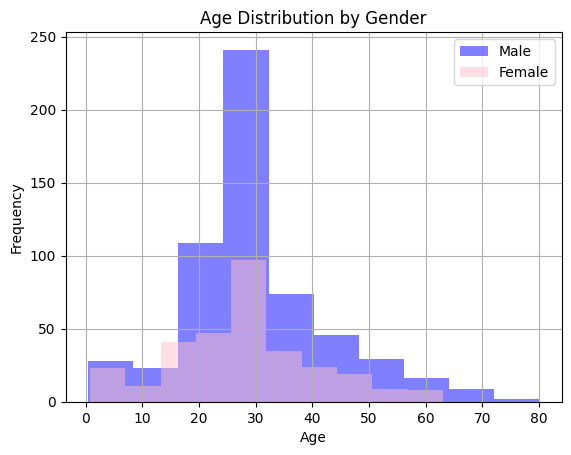

In [1143]:
male_age.hist(alpha=0.5, label='Male', color='blue')
female_age.hist(alpha=0.5, label='Female', color='pink')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Gender')
plt.show()

In [1144]:
fig = px.scatter(
	titanic_dataset,
	x='familySize',
	y='Fare',
	color='familySize',
	title='Titanic Passenger Fare Distribution by Total Family Count',
	labels={'familySize': 'Family Size', 'Fare': 'Fare'},
	width=700,
	height=500
)
fig.show()

In [1145]:
count_pclass_port = titanic_dataset.groupby(['Embarked','Pclass']).size().unstack()
count_pclass_port

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


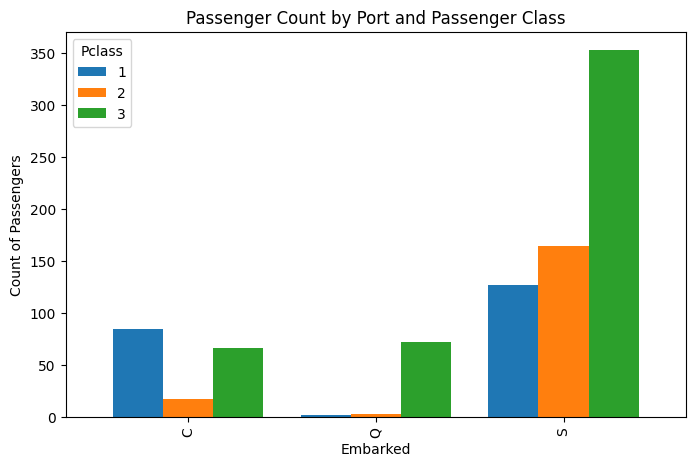

In [1146]:
count_pclass_port.plot(kind='bar', figsize=(8, 5), width=0.8)

plt.title('Passenger Count by Port and Passenger Class')
plt.xlabel('Embarked')
plt.ylabel('Count of Passengers')
plt.legend(title='Pclass')
plt.show()

In [1147]:
port_survival_rate = titanic_dataset.pivot_table(index='Embarked', columns='Pclass', values='Survived', aggfunc='mean')
port_survival_rate

Pclass,1,2,3
Embarked,,,
C,0.694118,0.529412,0.378788
Q,0.500000,0.666667,0.375000
S,0.582677,0.463415,0.189802


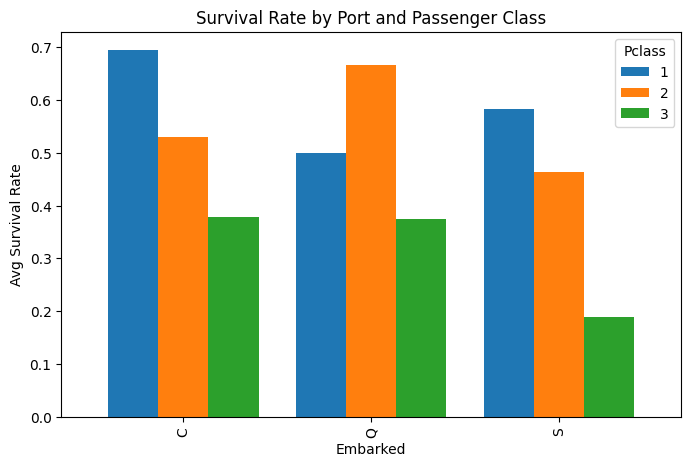

In [1148]:
port_survival_rate.plot(kind='bar', figsize=(8, 5), width=0.8)

plt.title('Survival Rate by Port and Passenger Class')
plt.xlabel('Embarked')
plt.ylabel('Avg Survival Rate')
plt.legend(title='Pclass')
plt.show()

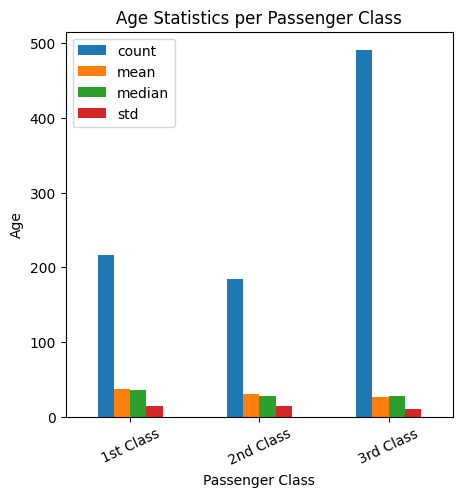

In [1149]:
ax = age_per_pclass[['count','mean', 'median', 'std']].plot(kind='bar', figsize=(5, 5), rot=0)
ax.set_xticks(range(len(age_per_pclass)))
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=25)
plt.title('Age Statistics per Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

In [1150]:
survived_stats

,Survived,count,mean,median,std
0,0,549,30.028233,28.0,12.499986
1,1,342,28.291433,28.0,13.764425


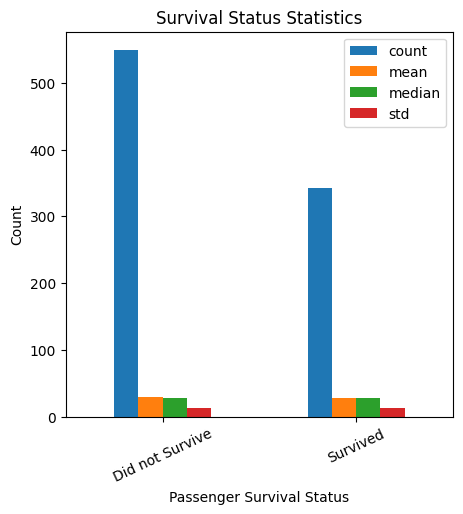

In [1151]:
ax = survived_stats[['count','mean', 'median', 'std']].plot(kind='bar', figsize=(5, 5), rot=0)
ax.set_xticks(range(len(survived_stats)))
ax.set_xticklabels(['Did not Survive', 'Survived'], rotation=25)
plt.title('Survival Status Statistics')
plt.xlabel('Passenger Survival Status')
plt.ylabel('Count')
plt.show()

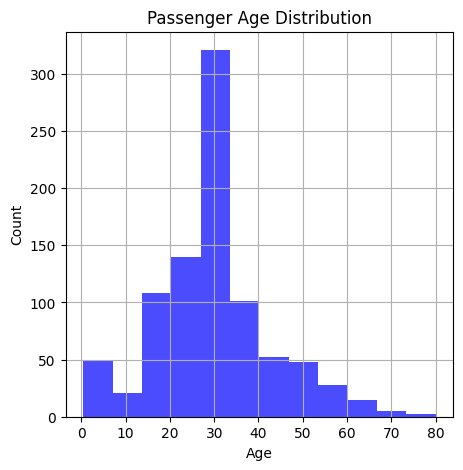

In [1152]:
titanic_dataset['Age'].hist(bins=12, figsize=(5, 5), color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Passenger Age Distribution')
plt.show()

In [1153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split


In [1154]:
titanic_dataset_copy = titanic_dataset.copy()

In [1155]:
titanic_dataset = pd.get_dummies(titanic_dataset, columns=['Pclass', 'Sex', 'Embarked'])

In [1156]:
titanic_dataset.head(1)

,PassengerId,Survived,Age,Fare,familySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,7.25,2,False,False,True,False,True,False,False,True


In [1157]:
X = titanic_dataset.drop(columns=['Survived','PassengerId'])
y = titanic_dataset['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [1158]:

from scipy.stats import randint
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(1,20),
    }

rf = RandomForestClassifier(random_state=42)

rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': <scipy.stats....001F5AC99AEB0>, 'n_estimators': <scipy.stats....001F5A7533C40>}"
,n_iter,5
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [1159]:
best_rf = rand_search.best_estimator_

print("Best Parameters for Random Forest Algorithm:", rand_search.best_params_)

Best Parameters for Random Forest Algorithm: {'max_depth': 9, 'n_estimators': 149}


In [1160]:
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)    
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'\nRandom Forest Results:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')



Random Forest Results:
Accuracy: 0.81
Precision: 0.77
Recall: 0.74
F1 Score: 0.75


In [1161]:
y_proba = best_rf.predict_proba(X_test)[:, 1]
comparison = pd.DataFrame({'Predicted': y_pred, 'Survival_Probability_RandomForest': y_proba})
comparison.head(1)


,Predicted,Survival_Probability_RandomForest
0,0,0.254999


In [1162]:
titanic_dataset_copy.merge(comparison, left_index=True, right_index=True, suffixes=('_original_df', '_random_forest')).head(5)


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,familySize,Predicted,Survival_Probability_RandomForest
0,1,0,3,male,22.0,7.2500,S,2,0,0.254999
1,2,1,1,female,38.0,71.2833,C,2,0,0.089279
2,3,1,3,female,26.0,7.9250,S,1,0,0.137702
3,4,1,1,female,35.0,53.1000,S,2,1,0.993289
4,5,0,3,male,35.0,8.0500,S,1,0,0.425597


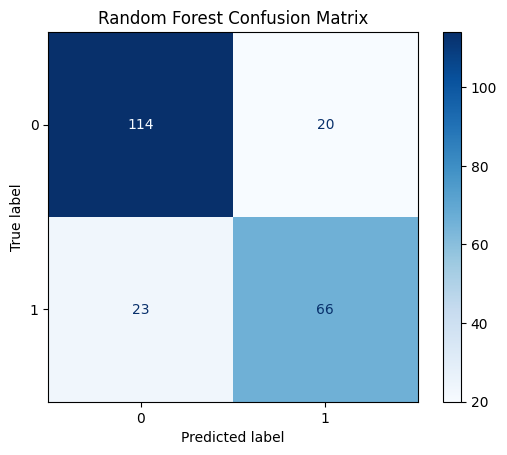

In [1163]:
# RandomForest confusion matrix
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [1164]:
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')

clf.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [1165]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)    
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  

print(f'\nDecision Tree Results:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:{confusion}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


# for i in range(5):
#     random_passenger = X_test.sample(1)
#     random_passenger_prediction = clf.predict(random_passenger)
#     print(f'{i}The random passenger survived' if random_passenger_prediction[0] == 1 else 'Did not survive')


Decision Tree Results:
Accuracy: 0.81
Confusion Matrix:[[118  16]
 [ 27  62]]
Precision: 0.79
Recall: 0.70
F1 Score: 0.74


In [1166]:
y_proba = clf.predict_proba(X_test)[:, 1]
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Survival_Probability_DecisionTree': y_proba})
comparison.head()


,Actual,Predicted,Survival_Probability_DecisionTree
709,1,0,0.112903
439,0,0,0.112903
840,0,0,0.112903
720,1,1,0.974576
39,1,1,0.582418


In [1167]:
titanic_dataset_copy.merge(comparison, left_index=True, right_index=True, suffixes=('_original_df', '_decision_tree')).head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,familySize,Actual,Predicted,Survival_Probability_DecisionTree
5,6,0,3,male,28.0,8.4583,Q,1,0,0,0.112903
7,8,0,3,male,2.0,21.0750,S,5,0,1,1.000000
10,11,1,3,female,4.0,16.7000,S,3,1,1,0.582418
23,24,1,1,male,28.0,35.5000,S,1,1,0,0.305556
25,26,1,3,female,38.0,31.3875,S,7,1,0,0.055556


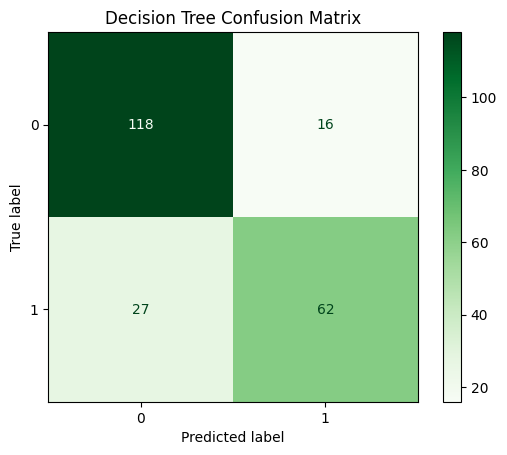

In [1168]:
# DecisionTree confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.show()


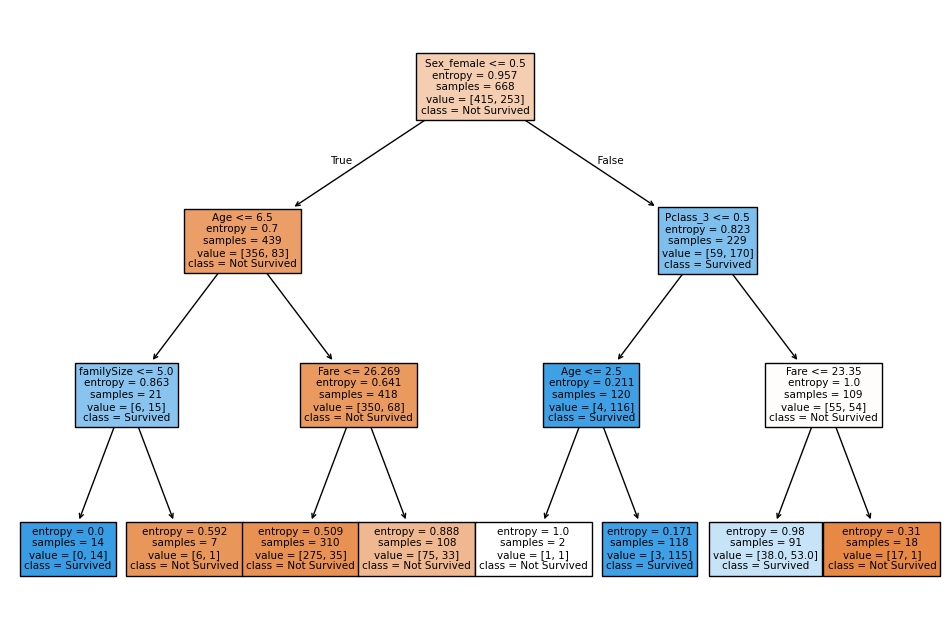

In [1169]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived','Survived'], filled=True)
plt.show()

In [1170]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)    
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [1171]:
# logistic regression
y_proba = lr.predict_proba(X_test)[:, 1]
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Survival_Probability_LogisticRegression': y_proba})
comparison.head()


,Actual,Predicted,Survival_Probability_LogisticRegression
709,1,0,0.111341
439,0,0,0.265334
840,0,0,0.124508
720,1,1,0.907186
39,1,1,0.765002


In [1172]:
titanic_dataset_copy.merge(comparison, left_index=True, right_index=True, suffixes=('_original_df', '_logistic_regression')).head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,familySize,Actual,Predicted,Survival_Probability_LogisticRegression
5,6,0,3,male,28.0,8.4583,Q,1,0,0,0.132249
7,8,0,3,male,2.0,21.0750,S,5,0,0,0.100641
10,11,1,3,female,4.0,16.7000,S,3,1,1,0.686685
23,24,1,1,male,28.0,35.5000,S,1,1,0,0.401835
25,26,1,3,female,38.0,31.3875,S,7,1,0,0.257004



Logistic Regression Results:
Accuracy: 0.80
Confusion Matrix: [[115  19]
 [ 26  63]]
Precision: 0.77
Recall: 0.71
F1 Score: 0.74


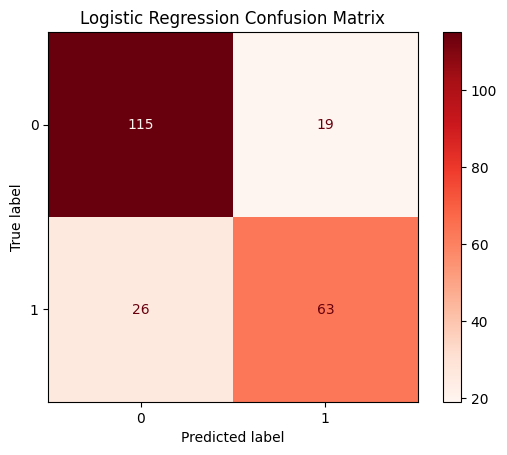

In [1173]:
print(f'\nLogistic Regression Results:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix: {confusion}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap="Reds")
plt.title("Logistic Regression Confusion Matrix")
plt.show()
